In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


from mempred import *

import datetime as dt

%matplotlib inline

/usr/lib/python3/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


,date_time,signal,signal_an
0,2012-06-24,1,1.0
1,2012-06-25,1,1.0
2,2012-06-26,7,7.0
3,2012-06-27,6,6.0
4,2012-06-28,6,6.0


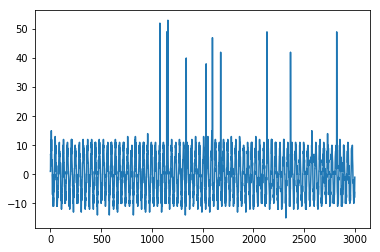

In [2]:
#generate sample trajectory with anomalies (noise periodic function)
t = np.arange(1, 3000, 1)
trj = 10*np.sin(t/(2*np.pi))



std_noise = np.std(trj)/4
# Generate an sample of white noise
mean_noise = 0
noise = np.random.normal(mean_noise, std_noise, len(trj))
# Noise up the original signal
trj_noisy = trj + noise

base = dt.datetime.today()
numdays = len(trj)
date_list = [base - dt.timedelta(days=x) for x in range(numdays)]

df = np.array([np.flip(date_list),trj_noisy])
        
data = pd.DataFrame(df.T, columns=['date_time','signal'])

data.index = pd.to_numeric(data.index, errors='coerce').fillna(0).astype(int)
data["signal"] = pd.to_numeric(data["signal"], errors='coerce').fillna(0).astype(int)
data['date_time'] = pd.to_datetime(data['date_time'] , unit='day')
data['date_time'] = data['date_time'].dt.round('D')

anomal = np.random.choice(data.index[1000:],10)
data['signal_an'] = data['signal'].loc[data.index.isin(anomal)] + np.max(data['signal'])*3
data['signal_an'] = data['signal_an'].fillna(data['signal'])

data['signal_an'].plot()

data.head()

In [5]:
#the program is running trough trajectory and is comparing the GLE prediction with the actual value
#If the error is higher than the criteria value (conf_interval), than a anomaly is detected

step_size = 5
conf_interval = 30
trunc = 50
data.index = pd.to_numeric(data.index, errors='coerce').fillna(0).astype(int)


anomaly = Anomaly_Detection(step_size = step_size, trunc = trunc, conf_interval = conf_interval, date_col = 'date_time', value = "signal_an")
found_ans = anomaly.search_anomaly(data = data, start = '2012-01-12', end = '2020-04-01')

starting prediction at: 2015-03-21 00:00:00
found anomaly!
2015-06-07T00:00:00.000000000
found anomaly!
2015-06-09T00:00:00.000000000
2015-06-10T00:00:00.000000000
2015-06-11T00:00:00.000000000
2015-06-12T00:00:00.000000000
2015-06-13T00:00:00.000000000
found anomaly!
2015-08-14T00:00:00.000000000
found anomaly!
2015-08-21T00:00:00.000000000
2015-08-22T00:00:00.000000000
found anomaly!
2015-08-25T00:00:00.000000000
found anomaly!
2015-08-28T00:00:00.000000000
2015-08-29T00:00:00.000000000
2015-08-30T00:00:00.000000000
2015-08-31T00:00:00.000000000
2015-09-01T00:00:00.000000000
found anomaly!
2015-09-04T00:00:00.000000000
2015-09-05T00:00:00.000000000
2015-09-06T00:00:00.000000000
found anomaly!
2015-09-08T00:00:00.000000000
2015-09-09T00:00:00.000000000
2015-09-10T00:00:00.000000000
2015-09-11T00:00:00.000000000
found anomaly!
2015-09-13T00:00:00.000000000
2015-09-14T00:00:00.000000000
2015-09-15T00:00:00.000000000
2015-09-16T00:00:00.000000000
found anomaly!
2015-09-23T00:00:00.000000

found anomaly!
2016-08-28T00:00:00.000000000
2016-08-29T00:00:00.000000000
2016-08-30T00:00:00.000000000
2016-08-31T00:00:00.000000000
found anomaly!
2016-09-03T00:00:00.000000000
2016-09-04T00:00:00.000000000
2016-09-05T00:00:00.000000000
found anomaly!
2016-09-06T00:00:00.000000000
2016-09-07T00:00:00.000000000
2016-09-08T00:00:00.000000000
2016-09-09T00:00:00.000000000
2016-09-10T00:00:00.000000000
found anomaly!
2016-09-12T00:00:00.000000000
2016-09-13T00:00:00.000000000
2016-09-14T00:00:00.000000000
2016-09-15T00:00:00.000000000
found anomaly!
2016-09-16T00:00:00.000000000
2016-09-17T00:00:00.000000000
2016-09-18T00:00:00.000000000
2016-09-19T00:00:00.000000000
2016-09-20T00:00:00.000000000
found anomaly!
2016-09-23T00:00:00.000000000
2016-09-24T00:00:00.000000000
2016-09-25T00:00:00.000000000
found anomaly!
2016-09-28T00:00:00.000000000
2016-09-29T00:00:00.000000000
2016-09-30T00:00:00.000000000
found anomaly!
2016-10-02T00:00:00.000000000
2016-10-03T00:00:00.000000000
2016-10-04

found anomaly!
2017-07-15T00:00:00.000000000
2017-07-16T00:00:00.000000000
2017-07-17T00:00:00.000000000
found anomaly!
2017-07-19T00:00:00.000000000
2017-07-20T00:00:00.000000000
2017-07-21T00:00:00.000000000
2017-07-22T00:00:00.000000000
found anomaly!
2017-07-23T00:00:00.000000000
2017-07-24T00:00:00.000000000
2017-07-25T00:00:00.000000000
2017-07-26T00:00:00.000000000
2017-07-27T00:00:00.000000000
found anomaly!
2017-07-29T00:00:00.000000000
2017-07-30T00:00:00.000000000
2017-07-31T00:00:00.000000000
2017-08-01T00:00:00.000000000
found anomaly!
2017-08-04T00:00:00.000000000
2017-08-05T00:00:00.000000000
2017-08-06T00:00:00.000000000
found anomaly!
2017-08-07T00:00:00.000000000
2017-08-08T00:00:00.000000000
2017-08-09T00:00:00.000000000
2017-08-10T00:00:00.000000000
2017-08-11T00:00:00.000000000
found anomaly!
2017-08-14T00:00:00.000000000
2017-08-15T00:00:00.000000000
2017-08-16T00:00:00.000000000
found anomaly!
2017-08-18T00:00:00.000000000
2017-08-19T00:00:00.000000000
2017-08-20

found anomaly!
2018-06-24T00:00:00.000000000
2018-06-25T00:00:00.000000000
2018-06-26T00:00:00.000000000
2018-06-27T00:00:00.000000000
found anomaly!
2018-06-30T00:00:00.000000000
2018-07-01T00:00:00.000000000
2018-07-02T00:00:00.000000000
found anomaly!
2018-07-07T00:00:00.000000000
found anomaly!
2018-07-09T00:00:00.000000000
2018-07-10T00:00:00.000000000
2018-07-11T00:00:00.000000000
2018-07-12T00:00:00.000000000
found anomaly!
2018-07-13T00:00:00.000000000
2018-07-14T00:00:00.000000000
2018-07-15T00:00:00.000000000
2018-07-16T00:00:00.000000000
2018-07-17T00:00:00.000000000
found anomaly!
2018-07-20T00:00:00.000000000
2018-07-21T00:00:00.000000000
2018-07-22T00:00:00.000000000
found anomaly!
2018-07-25T00:00:00.000000000
2018-07-26T00:00:00.000000000
2018-07-27T00:00:00.000000000
found anomaly!
2018-07-30T00:00:00.000000000
2018-07-31T00:00:00.000000000
2018-08-01T00:00:00.000000000
found anomaly!
2018-08-05T00:00:00.000000000
2018-08-06T00:00:00.000000000
found anomaly!
2018-08-10

found anomaly!
2019-06-19T00:00:00.000000000
2019-06-20T00:00:00.000000000
2019-06-21T00:00:00.000000000
2019-06-22T00:00:00.000000000
found anomaly!
2019-06-24T00:00:00.000000000
2019-06-25T00:00:00.000000000
2019-06-26T00:00:00.000000000
2019-06-27T00:00:00.000000000
found anomaly!
2019-06-30T00:00:00.000000000
2019-07-01T00:00:00.000000000
2019-07-02T00:00:00.000000000
found anomaly!
2019-07-04T00:00:00.000000000
2019-07-05T00:00:00.000000000
2019-07-06T00:00:00.000000000
2019-07-07T00:00:00.000000000
found anomaly!
2019-07-09T00:00:00.000000000
2019-07-10T00:00:00.000000000
2019-07-11T00:00:00.000000000
2019-07-12T00:00:00.000000000
found anomaly!
2019-07-15T00:00:00.000000000
2019-07-16T00:00:00.000000000
2019-07-17T00:00:00.000000000
found anomaly!
2019-07-19T00:00:00.000000000
2019-07-20T00:00:00.000000000
2019-07-21T00:00:00.000000000
2019-07-22T00:00:00.000000000
found anomaly!
2019-07-24T00:00:00.000000000
2019-07-25T00:00:00.000000000
2019-07-26T00:00:00.000000000
2019-07-27

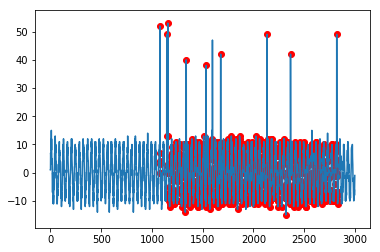

In [6]:
anomaly.plot_anomalies(data, found_ans)

plotting extracted memory kernel...


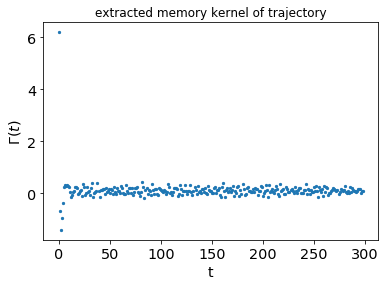

plotting running integral of kernel...


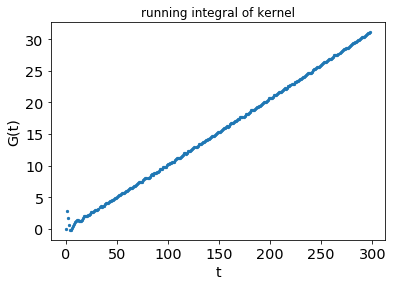

In [10]:
predict=GLEPredictionMETEO(bins=10,  cut = 3000 ,trunc=300, dt = 1, last_value_correction=True, no_fe=False, plot_pred = True)
kernel = predict.extractKernel([data["signal"].values], plot_kernel = True)